In [ ]:
import panda

In [1]:
import pandas as pd
import requests
import time
import numpy as np
import bs4

from mod.python_quant import get_finance_data #(fs,fr,invest_path)
from mod.python_quant import check_IFRS #(x): #N/A_IFRS(x)를 Nan으로 바꾸기
from mod.python_quant import low_per #(invest_df, index_date, num): #per기준으로 오름차순 정렬
from mod.python_quant import high_roa #(fr_df, index_date, num): #roa기준으로 내림차순 정렬
from mod.python_quant import magic_formula #(fr_df, invest_df, index_date, num): #마법공식 저per, 고roa 합성 함수
from mod.python_quant import get_value_rank #(invest_df, value_type, index_date, num): #저평가 지수 기준으로 정렬해 순위 만드는함수
from mod.python_quant import make_value_combo #(value_list, invest_df, index_date, num): #저평가 지표 조합 함수
from mod.python_quant import get_fscore #(fs_df, index_date, num): #f스코어
from mod.python_quant import new_price_data #(path): #가격데이터 전처리함수
from mod.python_quant import get_momentum_rank #(price_df, index_date, date_range, num): #모멘텀 함수
from mod.python_quant import get_value_quality #(invest_df, fs_df, index_date, num): #저평가 지수 + f스코어

fs_path = r'C:\Users\gjals\Desktop\코딩\재무데이터.xlsx'
fr_path = r'C:\Users\gjals\Desktop\코딩\재무비율데이터.xlsx'
invest_path = r'C:\Users\gjals\Desktop\코딩\투자지표데이터.xlsx'
price_path = r'C:\Users\gjals\Desktop\코딩\가격데이터.xlsx'

In [2]:
fs_df = get_finance_data(fs_path)
fr_df = get_finance_data(fr_path)
invest_df = get_finance_data(invest_path)

In [3]:
price_df = pd.read_excel(price_path)

In [4]:
price_df

,Unnamed: 0,060310,095570,006840,054620,265520,211270,027410,282330,138930,...,084110,145020,069260,024060,010240,189980,000540,003280,037440,238490
0,2014-09-19,3105,NaN,62200,5685,NaN,NaN,16289,NaN,16819,...,36447,NaN,24250,2600,2048,NaN,4405,3324,5550,NaN
1,2014-09-22,3140,NaN,64000,5528,NaN,NaN,16186,NaN,16867,...,36994,NaN,24100,2580,2000,NaN,4415,3201,5530,NaN
2,2014-09-23,3115,NaN,63400,5394,NaN,NaN,16495,NaN,16963,...,36927,NaN,24050,2765,1988,NaN,4450,3185,5500,NaN
3,2014-09-24,3095,NaN,64100,5432,NaN,NaN,16521,NaN,17059,...,37200,NaN,24050,2660,1965,NaN,4300,3236,5520,NaN
4,2014-09-25,3100,NaN,64400,5402,NaN,NaN,16289,NaN,16915,...,36583,NaN,24150,2740,1968,NaN,4270,3194,5420,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2020-10-21,2070,3775.0,17700,7950,22600.0,7100.0,4200,136000.0,5610,...,30800,197900.0,23300,6170,5500,1585.0,2845,258,3760,13750.0
1496,2020-10-22,2085,3755.0,17950,7770,22200.0,7020.0,4230,135000.0,5770,...,30000,219900.0,23000,6100,5310,1590.0,2885,258,3760,13400.0
1497,2020-10-23,2065,3660.0,18250,7660,21950.0,7000.0,4225,133500.0,5910,...,30000,211600.0,23300,6130,5210,1580.0,2970,258,3760,13350.0
1498,2020-10-26,2050,3570.0,18150,7230,21550.0,6720.0,4310,129000.0,5810,...,29050,189000.0,22700,5950,5180,1500.0,2865,258,3700,12700.0


In [5]:
for i in range(0, 1500):
    price_df = price_df.rename(index={i : price_df['Unnamed: 0'][i]})
    
price_df=price_df.drop(price_df.columns[0:1], axis=1, inplace=False)

In [6]:
price_df

,060310,095570,006840,054620,265520,211270,027410,282330,138930,001460,...,084110,145020,069260,024060,010240,189980,000540,003280,037440,238490
2014-09-19,3105,NaN,62200,5685,NaN,NaN,16289,NaN,16819,281500,...,36447,NaN,24250,2600,2048,NaN,4405,3324,5550,NaN
2014-09-22,3140,NaN,64000,5528,NaN,NaN,16186,NaN,16867,280500,...,36994,NaN,24100,2580,2000,NaN,4415,3201,5530,NaN
2014-09-23,3115,NaN,63400,5394,NaN,NaN,16495,NaN,16963,282000,...,36927,NaN,24050,2765,1988,NaN,4450,3185,5500,NaN
2014-09-24,3095,NaN,64100,5432,NaN,NaN,16521,NaN,17059,284000,...,37200,NaN,24050,2660,1965,NaN,4300,3236,5520,NaN
2014-09-25,3100,NaN,64400,5402,NaN,NaN,16289,NaN,16915,288500,...,36583,NaN,24150,2740,1968,NaN,4270,3194,5420,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-21,2070,3775.0,17700,7950,22600.0,7100.0,4200,136000.0,5610,226000,...,30800,197900.0,23300,6170,5500,1585.0,2845,258,3760,13750.0
2020-10-22,2085,3755.0,17950,7770,22200.0,7020.0,4230,135000.0,5770,231000,...,30000,219900.0,23000,6100,5310,1590.0,2885,258,3760,13400.0
2020-10-23,2065,3660.0,18250,7660,21950.0,7000.0,4225,133500.0,5910,230000,...,30000,211600.0,23300,6130,5210,1580.0,2970,258,3760,13350.0
2020-10-26,2050,3570.0,18150,7230,21550.0,6720.0,4310,129000.0,5810,240500,...,29050,189000.0,22700,5950,5180,1500.0,2865,258,3700,12700.0


In [7]:
low_pbr_st = get_value_rank(invest_df, 'PBR', '2016/12', 20)

In [8]:
low_pbr_st.index

Index(['A064520', 'A058220', 'A056730', 'A083470', 'A012170', 'A101000',
       'A000950', 'A001470', 'A003300', 'A009410', 'A019010', 'A001530',
       'A003480', 'A005010', 'A106080', 'A009200', 'A101930', 'A082740',
       'A058650', 'A001940'],
      dtype='object')

In [9]:
code_list = []
for code in low_pbr_st.index:
    code_list.append(code.replace('A',''))

pbr_price = price_df[code_list]['2017-6':]

In [10]:
pbr_price

,064520,058220,056730,083470,012170,101000,000950,001470,003300,009410,019010,001530,003480,005010,106080,009200,101930,082740,058650,001940
2017-06-01,4253,2350,2501,11567,4100,9638,25100,3150,79112,3615,1445,55972,5600,15900,16128,2760,4950,2932,153000,13789
2017-06-02,4231,2353,2530,11767,4080,9638,25500,3180,81624,3790,1440,56636,5550,15650,15941,2750,4955,2939,158000,14170
2017-06-05,4242,2410,2530,11627,4040,9930,25200,2600,79112,3750,1450,57112,5500,15850,15565,2740,5080,2998,160000,14430
2017-06-07,4220,2588,2458,11327,4040,10310,25450,2690,79426,3800,1470,58443,5520,15850,15148,2715,5080,2974,159500,14831
2017-06-08,4102,2650,2530,11467,4000,11390,25200,2740,78170,3850,1475,57873,5420,15750,15127,2755,5040,2918,162000,14571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-21,1005,275,1550,1585,600,755,30000,2950,47400,9920,1500,86400,4075,7000,3330,2410,4015,4965,71500,11800
2020-10-22,1005,275,1550,1585,600,759,29000,2775,46600,10150,1480,85600,4125,6990,3330,2385,4005,5020,71500,11850
2020-10-23,1005,275,1550,1585,600,745,28800,3115,46650,10000,1500,86800,4170,7140,3330,2385,3955,4915,71600,11900
2020-10-26,1005,275,1550,1585,600,737,28350,3900,45500,10100,1490,84600,4080,6910,3330,2420,3825,4725,71300,11800


In [11]:
pf_stock_num = {}
stock_amount = 0

for code in pbr_price.columns:
    temp = int(5000000 / pbr_price[code][0])
    pf_stock_num[code] = temp
    stock_amount = stock_amount + temp * pbr_price[code][0]

cash_amount = 100000000 - stock_amount

In [12]:
stock_pf = 0
for code in pbr_price.columns:
    stock_pf = stock_pf + pbr_price[code] * pf_stock_num[code]

In [13]:
low_pbr_backtest = pd.DataFrame({'주식포트폴리오':stock_pf[:'2018-5']})

In [14]:
low_pbr_backtest

,주식포트폴리오
2017-06-01,99813329
2017-06-02,100598865
2017-06-05,99926768
2017-06-07,100603544
2017-06-08,101093378
...,...
2018-05-25,100335463
2018-05-28,105625284
2018-05-29,102879624
2018-05-30,103240442


In [15]:
low_pbr_backtest['현금포트폴리오'] = [cash_amount] * len(low_pbr_backtest)

In [16]:
low_pbr_backtest

,주식포트폴리오,현금포트폴리오
2017-06-01,99813329,186671
2017-06-02,100598865,186671
2017-06-05,99926768,186671
2017-06-07,100603544,186671
2017-06-08,101093378,186671
...,...,...
2018-05-25,100335463,186671
2018-05-28,105625284,186671
2018-05-29,102879624,186671
2018-05-30,103240442,186671


In [17]:
low_pbr_backtest['종합포트폴리오'] = low_pbr_backtest['주식포트폴리오'] + low_pbr_backtest['현금포트폴리오']
low_pbr_backtest['일변화울'] = low_pbr_backtest['종합포트폴리오'].pct_change()

In [18]:
low_pbr_backtest['총변화율'] = low_pbr_backtest['종합포트폴리오']/100000000 - 1

In [19]:
low_pbr_backtest

,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화울,총변화율
2017-06-01,99813329,186671,100000000,NaN,0.000000
2017-06-02,100598865,186671,100785536,0.007855,0.007855
2017-06-05,99926768,186671,100113439,-0.006669,0.001134
2017-06-07,100603544,186671,100790215,0.006760,0.007902
2017-06-08,101093378,186671,101280049,0.004860,0.012800
...,...,...,...,...,...
2018-05-25,100335463,186671,100522134,-0.022408,0.005221
2018-05-28,105625284,186671,105811955,0.052623,0.058120
2018-05-29,102879624,186671,103066295,-0.025948,0.030663
2018-05-30,103240442,186671,103427113,0.003501,0.034271


In [20]:
import matplotlib.pyplot as plt

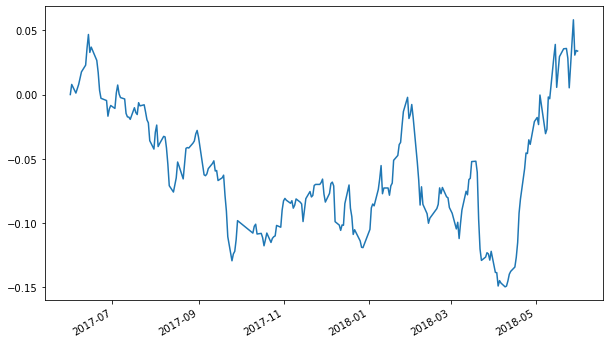

In [21]:
plt.figure(figsize=(10, 6))
low_pbr_backtest['총변화율'].plot()
plt.show()

In [22]:
def backtest_beta(price_df, strategy_df, start_date, end_date, initial_money):

    code_list = []
    for code in strategy_df.index:
        code_list.append(code.replace('A',''))

    strategy_price = price_df[code_list][start_date:end_date]

    pf_stouck_num = {}
    stock_amount = 0
    stock_pf = 0
    each_money = initial_money / len(strategy_df)
    for code in strategy_price.columns:
        temp = int(each_money / strategy_price[code][0])
        pf_stock_num[code] = temp
        stock_amount = stock_amount + temp * strategy_price[code][0]
        stock_pf = stock_pf + strategy_price[code] * pf_stock_num[code]

    cash_amount = initial_money - stock_amount

    backtest_df = pd.DataFrame({'주식포트폴리오':stock_pf})
    backtest_df['현금포트폴리오'] = [cash_amount] * len(backtest_df)
    backtest_df['종합포트폴리오'] = backtest_df['주식포트폴리오'] + backtest_df['현금포트폴리오']
    backtest_df['일변화율'] = backtest_df['종합포트폴리오'].pct_change()
    backtest_df['총변화율'] = backtest_df['종합포트폴리오']/initial_money - 1

    return backtest_df

In [23]:
strategy_date = '2016/12'
start_date = '2017-6'
end_date = '2018-5'
initial_money = 10000000

low_per = get_value_rank(invest_df, 'PER', strategy_date, 20)
per_backtest = backtest_beta(price_df , low_per, start_date, end_date, initial_money)

ValueError: cannot convert float NaN to integer

In [24]:
# def select_code_by_price(price_df, data_df, start_date):
#     new_code_list = []
#     for code in price_df[start_date].iloc[0].dropna().index:
#         new_code_list.append('A' + code)
        
#     selected_df =  data_df.loc[new_code_list]
#     return selected_df

In [25]:
def select_code_by_price(price_df, data_df, start_date):
    new_code_list = []
    for code in price_df[start_date].iloc[0].dropna().index:
        new_code_list.append('A' + code)
        
    selected_df = data_df.loc[data_df.index.intersection(new_code_list)] #유효한 키만 선택
    return selected_df

In [26]:
strategy_date = '2016/12'
start_date = '2017-6'
end_date = '2018-5'
initial_money = 100000000

low_per = get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PER', strategy_date, 20)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

In [27]:
per_backtest

,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2017-06-01,99883746.0,116254.0,100000000.0,NaN,0.000000
2017-06-02,102169701.0,116254.0,102285955.0,0.022860,0.022860
2017-06-05,102785830.0,116254.0,102902084.0,0.006024,0.029021
2017-06-07,102314339.0,116254.0,102430593.0,-0.004582,0.024306
2017-06-08,102968817.0,116254.0,103085071.0,0.006389,0.030851
...,...,...,...,...,...
2018-05-25,130818509.0,116254.0,130934763.0,-0.031290,0.309348
2018-05-28,133825685.0,116254.0,133941939.0,0.022967,0.339419
2018-05-29,131995544.0,116254.0,132111798.0,-0.013664,0.321118
2018-05-30,132713178.0,116254.0,132829432.0,0.005432,0.328294


In [28]:
# strategy_date = '2015/12'
# start_date = '2016-6'
# end_date = '2017-5'
# initial_money = 100000000

# data_df = invest_df

# new_code_list = []
# for code in price_df[start_date].iloc[0].dropna().index:
#     new_code_list.append('A' + code)


# #data_df.reindex[new_code_list]
# selected_df = data_df.loc[data_df.index.intersection(new_code_list)]

# #return selected_df

# #유효한 키만 선택하려는 경우 다음과 같은 것이 관용적이고 효율적입니다. 선택 영역의 종류를 보존할 수 있습니다.
# #In [102]: labels = [1, 2, 3]
# #In [103]: s.loc[s.index.intersection(labels)]

# #low_per = get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PER', strategy_date, 20)
# #per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

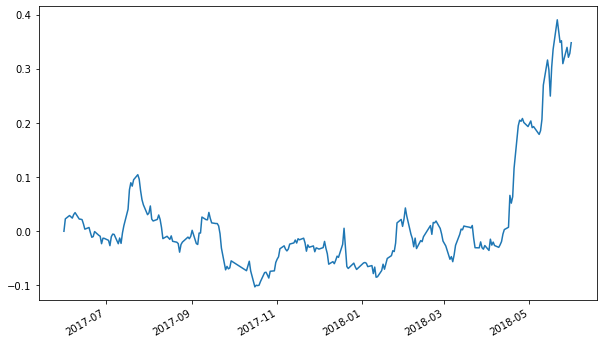

In [29]:
plt.figure(figsize=(10,6))
per_backtest['총변화율'].plot()
plt.show()

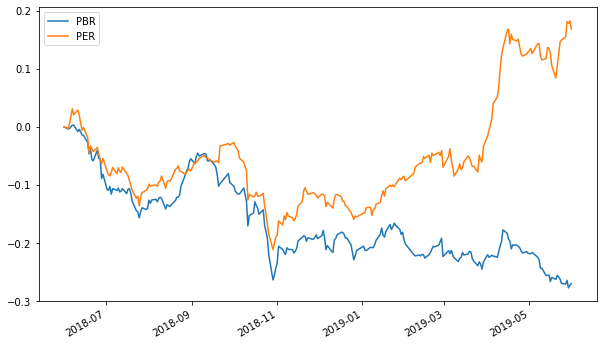

In [47]:
strategy_date = '2017/12'
start_date = '2018-6'
end_date = '2019-5'
initial_money = 100000000


low_pbr = get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PBR', strategy_date, 20)
pbr_backtest = backtest_beta(price_df, low_pbr, start_date, end_date, initial_money)
low_per = get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PER', strategy_date, 20)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

pbr_backtest = backtest_beta(price_df, low_pbr, start_date, end_date, initial_money)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

plt.figure(figsize=(10, 6))
pbr_backtest['총변화율'].plot(label='PBR')
per_backtest['총변화율'].plot(label='PER')
plt.legend()
plt.show()

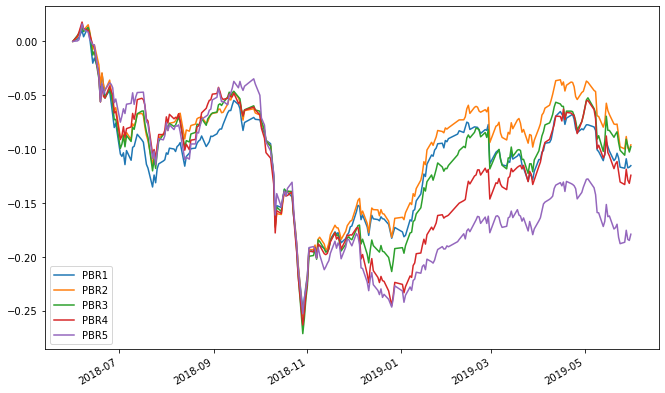

In [48]:
strategy_date = '2017/12'
start_date = '2018-6'
end_date = '2019-5'
initial_money = 100000000

all_pbr = get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PBR', strategy_date, None).dropna()

length = int(len(all_pbr)/5)

pbr_backtest1 = backtest_beta(price_df, all_pbr[:length], start_date, end_date, initial_money)
pbr_backtest2 = backtest_beta(price_df, all_pbr[length:length*2], start_date, end_date, initial_money)
pbr_backtest3 = backtest_beta(price_df, all_pbr[length*2:length*3], start_date, end_date, initial_money)
pbr_backtest4 = backtest_beta(price_df, all_pbr[length*3:length*4], start_date, end_date, initial_money)
pbr_backtest5 = backtest_beta(price_df, all_pbr[length*4:], start_date, end_date, initial_money)

plt.figure(figsize=(11, 7))
pbr_backtest1['총변화율'].plot(label='PBR1')
pbr_backtest2['총변화율'].plot(label='PBR2')
pbr_backtest3['총변화율'].plot(label='PBR3')
pbr_backtest4['총변화율'].plot(label='PBR4')
pbr_backtest5['총변화율'].plot(label='PBR5')
plt.legend()
plt.show()

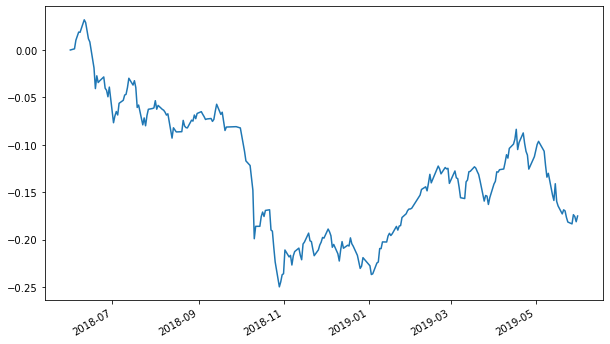

In [46]:
strategy_date = '2017/12'
start_date = '2018-6'
end_date = '2019-5'
initial_money = 100000000

f_score_result = get_fscore(select_code_by_price(price_df, fs_df, start_date), strategy_date, 20)
f_score_backtest = backtest_beta(price_df, f_score_result, start_date, end_date, initial_money)

plt.figure(figsize=(10,6))
f_score_backtest['총변화율'].plot()
plt.show()

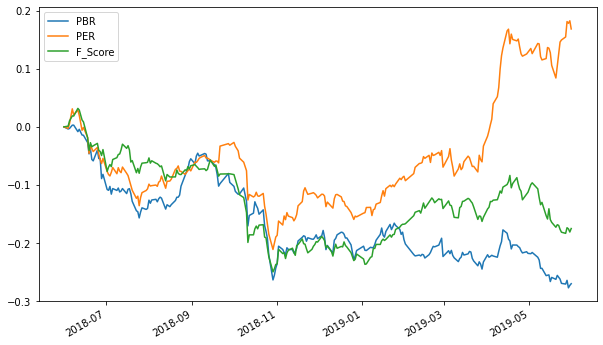

In [50]:
plt.figure(figsize=(10, 6))
pbr_backtest['총변화율'].plot(label='PBR')
per_backtest['총변화율'].plot(label='PER')
f_score_backtest['총변화율'].plot(label='F_Score')
plt.legend()
plt.show()

In [162]:
def get_strategy_date(start_date):
    temp_year = int(start_date.split('-')[0])
    temp_month = start_date.split('-')[1]
    if temp_month in '1 2 3 4 5'.split(' '):
        strategy_date = str(temp_year - 2) + '/12'
    else:
        strategy_date = str(temp_year - 1) + '/12'
    return strategy_date

In [163]:
start_date = '2016-6'
end_date = '2019-5'

start_year = int(start_date.split('-')[0])
end_year = int(end_date.split('-')[0])

for temp in range(start_year, end_year):
    print(str(temp) + '-6', str(temp+1) + '-6')

2016-6 2017-6
2017-6 2018-6
2018-6 2019-6


In [164]:
start_date1 = '2017-6'
end_date1 = '2018-5'
strategy_date1 = get_strategy_date(start_date1)
initial_money1 = 100000000

low_per1 = get_value_rank(select_code_by_price(price_df, invest_df, start_date1), 'PER', strategy_date1, 20)
per_backtest1 = backtest_beta(price_df, low_per1, start_date1, end_date1, initial_money1)

start_date2 = '2018-6'
end_date2 = '2019-5'
strategy_date2 = get_strategy_date(start_date2)
initial_money2 = 100000000

low_per2 = get_value_rank(select_code_by_price(price_df, invest_df, start_date2), 'PER', strategy_date2, 20)
per_backtest2 = backtest_beta(price_df, low_per2, start_date2, end_date2, initial_money2)

In [79]:
start_date1 = '2017-6'
end_date1 = '2018-6'
strategy_date1 = get_strategy_date(start_date1)
initial_money1 = 100000000

low_per1 = get_value_rank(select_code_by_price(price_df, invest_df, start_date1), 'PER', strategy_date1, 20)
per_backtest1 = backtest_beta(price_df, low_per1, start_date1, end_date1, initial_money1)
temp_end1 = per_backtest1[end_date1].index[0]
per_backtest1 = per_backtest1[:temp_end1]

start_date2 = '2018-6'
end_date2 = '2019-6'
strategy_date2 = get_strategy_date(start_date2)
initial_money2 = per_backtest1['종합포트폴리오'][-1]

low_per2 = get_value_rank(select_code_by_price(price_df, invest_df, start_date2), 'PER', strategy_date2, 20)
per_backtest2 = backtest_beta(price_df, low_per2, start_date2, end_date2, initial_money2)
temp_end2 = per_backtest2[end_date2 ].index[0]
per_backtest2 = per_backtest2[:temp_end2]

In [84]:
total_backtest = pd.concat([per_backtest1[:-1], per_backtest2])

In [85]:
total_backtest

,주식포트폴리오,현금포트폴리오,종합포트폴리오,일변화율,총변화율
2017-06-01,99883746.0,116254.0,100000000.0,NaN,0.000000
2017-06-02,102169701.0,116254.0,102285955.0,0.022860,0.022860
2017-06-05,102785830.0,116254.0,102902084.0,0.006024,0.029021
2017-06-07,102314339.0,116254.0,102430593.0,-0.004582,0.024306
2017-06-08,102968817.0,116254.0,103085071.0,0.006389,0.030851
...,...,...,...,...,...
2019-05-28,159634292.0,417046.0,160051338.0,0.022933,0.181827
2019-05-29,159229416.0,417046.0,159646462.0,-0.002530,0.178837
2019-05-30,159810996.0,417046.0,160228042.0,0.003643,0.183131
2019-05-31,157907122.0,417046.0,158324168.0,-0.011882,0.169073


In [86]:
total_backtest['일변화율'] = total_backtest['종합포트폴리오'].pct_change()
total_backtest['총변화율'] = total_backtest['종합포트폴리오']/total_backtest['종합포트폴리오'][0]-1

In [99]:
start_date = '2017-6'
end_date = '2019-5'
initial_money = 100000000

start_year = int(start_date.split('-')[0])
end_date = int(end_date.split('-')[0])

total_df = 0
for temp in range(start_year, end_year):
    this_term_start = str(temp) + '-6'
    this_term_end = str(temp+1) + '-6'
    strategy_date = get_strategy_date(this_term_start)
    low_per = get_value_rank(select_code_by_price(price_df, invest_df, this_term_start), 'PER', strategy_date, 20)
    per_backtest = backtest_beta(price_df, low_per, this_term_start, this_term_end, initial_money)
    temp_end = per_backtest[this_term_end].index[0]
    per_backtest = per_backtest[:temp_end]
    initial_money = per_backtest['종합포트폴리오'][-1]
    if temp == start_year:
        total_df = per_backtest
    else:
        total_df = pd.concat([total_df[:-1], per_backtest])

total_df['일변화율'] = total_df['종합포트폴리오'].pct_change()
total_df['총변화율'] = total_df['종합포트폴리오']/total_df['종합포트폴리오'][0]-1

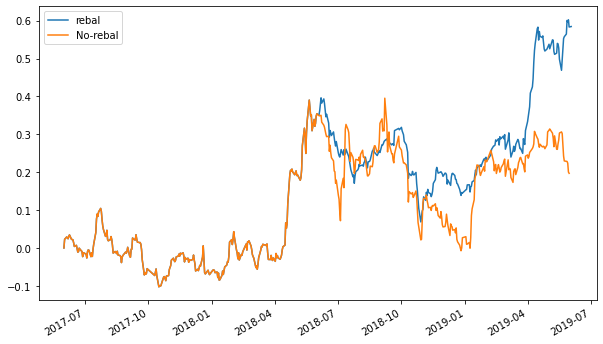

In [105]:
start_date = '2017-6'
end_date = '2019-5'
initial_money = 100000000

start_year = int(start_date.split('-')[0])
end_year = int(end_date.split('-')[0])

total_df = 0
for temp in range(start_year, end_year):
    this_term_start = str(temp) + '-6'
    this_term_end = str(temp+1) + '-6'
    strategy_date = get_strategy_date(this_term_start)
    low_per = get_value_rank(select_code_by_price(price_df, invest_df, this_term_start), 'PER', strategy_date, 20)
    per_backtest = backtest_beta(price_df, low_per, this_term_start, this_term_end, initial_money)
    temp_end = per_backtest[this_term_end].index[0]
    per_backtest = per_backtest[:temp_end]
    initial_money =  per_backtest['종합포트폴리오'][-1]
    if temp == start_year:
        total_df = per_backtest
    else:
        total_df = pd.concat([total_df[:-1], per_backtest])
        
total_df ['일변화율'] = total_df ['종합포트폴리오'].pct_change()
total_df ['총변화율'] = total_df ['종합포트폴리오']/ total_df ['종합포트폴리오'][0] - 1

low_per = get_value_rank(select_code_by_price(price_df, invest_df, start_date), 'PER', get_strategy_date(start_date), 20)
per_backtest = backtest_beta(price_df, low_per, start_date, end_date, initial_money)

plt.figure(figsize=(10, 6))
total_backtest['총변화율'].plot(label='rebal')
per_backtest['총변화율'].plot(label='No-rebal')
plt.legend()
plt.show()

In [106]:
def backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, num, value_type=None, value_list=None, date_range=None):
    
    start_year = int(start_date.split('-')[0])
    end_year = int(end_date.split('-')[0])

    total_df = 0
    for temp in range(start_year, end_year):
        this_term_start = str(temp) + '-' + start_date.split('-')[1]
        this_term_end = str(temp+1) + '-' + start_date.split('-')[1]
        strategy_date = get_strategy_date(this_term_start)
        
        if strategy.__name__ == 'high_roa':
            st_df = strategy(select_code_by_price(price_df, fr_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'magic_formula':
            st_df = strategy(select_code_by_price(price_df, invest_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'get_value_rank':
            st_df = strategy(select_code_by_price(price_df, invest_df, this_term_start), value_type, strategy_date, num)
        elif strategy.__name__ == 'make_value_combo':
            st_df = strategy(value_list, select_code_by_price(price_df, invest_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'get_fscore':
            st_df = strategy(select_code_by_price(price_df, fs_df, this_term_start), strategy_date, num)
        elif strategy.__name__ == 'get_momentum_rank':
            st_df = strategy(price_df, price_df[this_term_start].index[0] , date_range, num)
        elif strategy.__name__ == 'get_value_quality':
            st_df = strategy(select_code_by_price(price_df, invest_df, this_term_start), 
                             select_code_by_price(price_df, fs_df, this_term_start), strategy_date, num)
        
        backtest = backtest_beta(price_df, st_df, this_term_start, this_term_end, initial_money)
        temp_end = backtest[this_term_end].index[0]
        backtest = backtest[:temp_end]
        initial_money =  backtest['종합포트폴리오'][-1]
        if temp == start_year:
            total_df = backtest
        else:
            total_df = pd.concat([total_df[:-1], backtest])

    total_df ['일변화율'] = total_df ['종합포트폴리오'].pct_change()
    total_df ['총변화율'] = total_df ['종합포트폴리오']/ total_df ['종합포트폴리오'][0] - 1
    
    return total_df

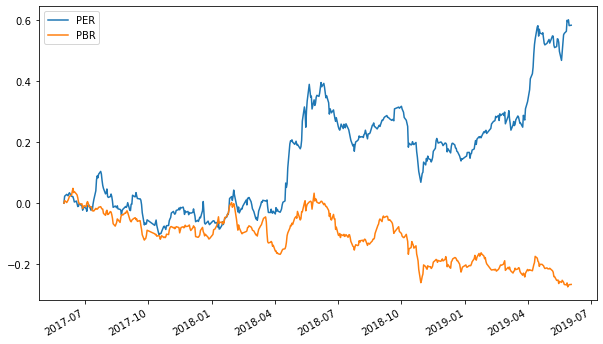

In [109]:
start_date = '2017-6'
end_date = '2019-5'
initial_money = 100000000
strategy = get_value_rank

back_test_result1 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PER')
back_test_result2 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PBR')

plt.figure(figsize=(10, 6))
back_test_result1['총변화율'].plot(label='PER')
back_test_result2['총변화율'].plot(label='PBR')
plt.legend()
plt.show()

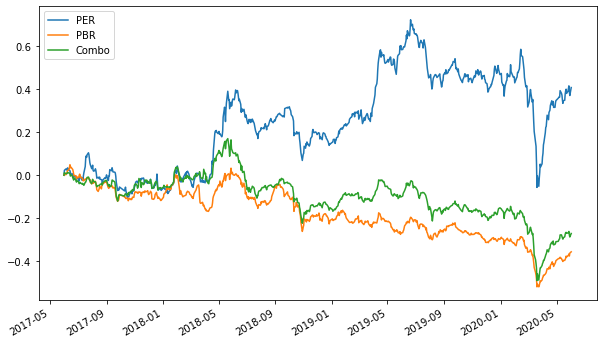

In [125]:
start_date = '2017-6'
end_date = '2020-5'
initial_money = 100000000
strategy = get_value_rank
strategy2 = make_value_combo

back_test_result1 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PER')
back_test_result2 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PBR')
back_test_result3 = backtest_re(strategy2, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_list=['PER','PBR'])

plt.figure(figsize=(10, 6))
back_test_result1['총변화율'].plot(label='PER')
back_test_result2['총변화율'].plot(label='PBR')
back_test_result3['총변화율'].plot(label='Combo')
plt.legend()
plt.show()

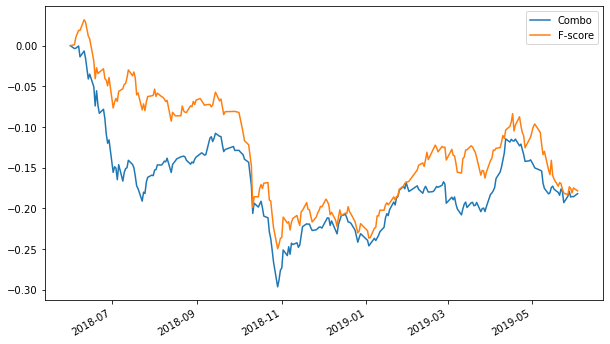

In [122]:
start_date = '2018-6'
end_date = '2019-6'
initial_money = 100000000
strategy1 = make_value_combo
strategy2 = get_fscore

back_test_result1 = backtest_re(strategy1, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_list=['PER','PBR'])
back_test_result2 = backtest_re(strategy2, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20)

plt.figure(figsize=(10, 6))
back_test_result1['총변화율'].plot(label='Combo')
back_test_result2['총변화율'].plot(label='F-score')
plt.legend()
plt.show()

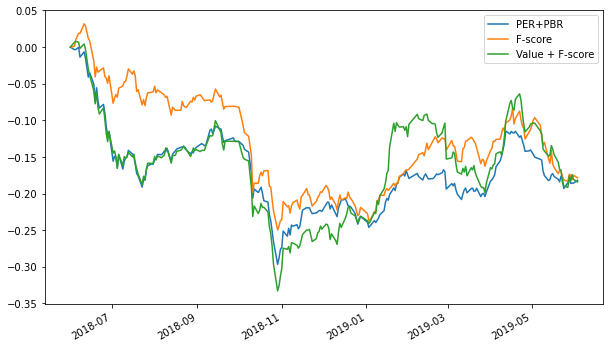

In [145]:
start_date = '2018-6'
end_date = '2019-12'
initial_money = 100000000
strategy1 = make_value_combo
strategy2 = get_fscore
strategy3 = get_value_quality

back_test_result1 = backtest_re(strategy1, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_list=['PER','PBR'])
back_test_result2 = backtest_re(strategy2, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20)
back_test_result3 = backtest_re(strategy3, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20)

plt.figure(figsize=(10, 6))
back_test_result1['총변화율'].plot(label='PER+PBR')
back_test_result2['총변화율'].plot(label='F-score')
back_test_result3['총변화율'].plot(label='Value + F-score')
plt.legend()
plt.show()

In [136]:
start_date = '2017-6'
end_date = '2020-5'
initial_money = 100000000
strategy = get_value_rank
back_test_result = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PER')

num_of_year = int(end_date.split('-')[0]) - int(start_date.split('-')[0])
CAGR = (back_test_result.iloc[-1]['종합포트폴리오'] / back_test_result.iloc[0]['종합포트폴리오']) ** (1/num_of_year) - 1

In [137]:
CAGR

0.12069145228326383

In [138]:
max_list = [0]
mdd_list = [0]

for i in back_test_result.index[1:]:
    max_list.append(back_test_result['총변화율'][:i].max())
    if max_list[-1] > max_list[-2]:
        mdd_list.append(0)
    else:
        mdd_list.append(min(back_test_result['총변화율'][i] - max_list[-1], mdd_list[-1])   )
        
back_test_result['max'] = max_list
back_test_result['MDD'] = mdd_list

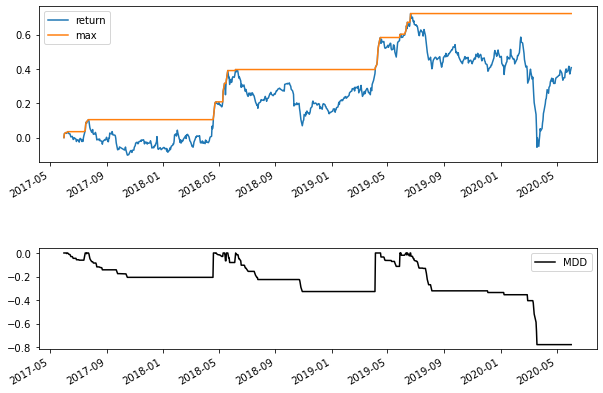

In [158]:
plt.figure(figsize=(10, 7))
plt.subplot(2,1,1)
back_test_result['총변화율'].plot(label='return')
back_test_result['max'].plot(label='max')
plt.legend()

plt.subplot(3,1,3)
back_test_result['MDD'].plot(label='MDD', c='black')
plt.legend()

In [140]:
def get_mdd(back_test_df):
    max_list = [0]
    mdd_list = [0]

    for i in back_test_df.index[1:]:
        max_list.append(back_test_df['총변화율'][:i].max())
        if max_list[-1] > max_list[-2]:
            mdd_list.append(0)
        else:
            mdd_list.append(min(back_test_df['총변화율'][i] - max_list[-1], mdd_list[-1])   )

    back_test_df['max'] = max_list
    back_test_df['MDD'] = mdd_list
    
    return back_test_df

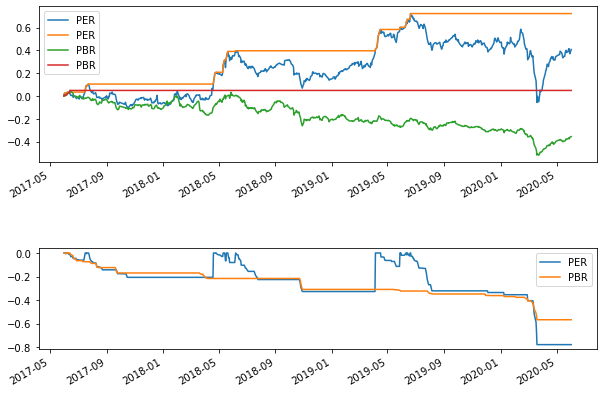

In [141]:
start_date = '2017-6'
end_date = '2020-5'
initial_money = 100000000
strategy = get_value_rank

back_test_result1 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PER')
back_test_result2 = backtest_re(strategy, start_date, end_date, initial_money, price_df, fr_df, fs_df, 20, value_type='PBR')

back_test_result1 = get_mdd(back_test_result1)
back_test_result2 = get_mdd(back_test_result2)


plt.figure(figsize=(10, 7))
plt.subplot(2,1,1)
back_test_result1['총변화율'].plot(label='PER')
back_test_result1['max'].plot(label='PER')
back_test_result2['총변화율'].plot(label='PBR')
back_test_result2['max'].plot(label='PBR')
plt.legend()

plt.subplot(3,1,3)
back_test_result1['MDD'].plot(label='PER')
back_test_result2['MDD'].plot(label='PBR')
plt.legend()